# Airbnb Data Analysis
Duke Impacting Investing Group <br>
Raymond Chen <br>
June 2020


## Environment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
import sklearn.model_selection as ms
import sklearn.metrics as metrics
import statsmodels.api as sm
import datetime as dt

## Dataset

The dataset we're using has been provided by Duke Impact Investing Group as a part of the Data Analyst Challenge. Unfortunately, there are few details describing the data, so we'll have to proceed with assumptions. Below, we'll get an idea of what variables are involved in this dataset.

In [2]:
airbnb = pd.read_csv("Airbnb.csv");
airbnb.dtypes

id                          int64
log_price                 float64
property_type              object
room_type                  object
amenities                  object
accommodates                int64
bathrooms                 float64
bed_type                   object
cancellation_policy        object
cleaning_fee                 bool
city                       object
description                object
first_review               object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate         object
host_since                 object
instant_bookable           object
last_review                object
latitude                  float64
longitude                 float64
name                       object
neighbourhood              object
number_of_reviews           int64
review_scores_rating      float64
thumbnail_url              object
zipcode                    object
bedrooms                  float64
beds                      float64
dtype: object

In [3]:
pd.set_option('display.max_columns', None)
print(airbnb.shape)
airbnb.head(5)

(74111, 29)


,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,t,t,NaN,2012-03-26,f,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,2017-08-05,t,f,100%,2017-06-19,t,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,2017-04-30,t,t,100%,2016-10-25,t,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,This light-filled home-away-from-home is super...,NaN,t,t,NaN,2015-04-19,f,NaN,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,"Cool, cozy, and comfortable studio located in ...",2015-05-12,t,t,100%,2015-03-01,t,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


## Research Question

I've never booked a listing on Airbnb myself, so I cannot say I fully understand how the booking or listing system works. However, it appears that listing prices are decided by the hosts, with some additional service fees being added by Airbnb. So given that listing prices appear to be "arbitrarily" set by hsots (excluding the additional service fees), the following question arises: can we predict the price of an Airbnb listing, and if so what variables can help in this process?

For this question, we have the response variable `log_price`, which is supposedly the price (we'll assume per night) log-transformed. We'll keep this for our analysis unless we need to transform it later.

To answer this question, we'll hypothesize several important variables that we believe are critical in predicting the price of an Airbnb listing. The variables are as follows:
- `property_type`
- `room_type`
- `accommodates`
- `bathrooms`
- `bed_type`
- `cancellation_policy`
- `cleaning_fee`
- `city`
- `host_has_profile_pic`
- `host_identitiy_verified`
- `instant_bookable`
- `number_of_reviews`
- `review_scores_rating`
- `bedrooms`
- `beds`

We also believe that the following variables may have an impact too, but we will have to transform those variables later since they are neither quantitative nor categorical variables we can simply plug into any analysis.
- `host_since`
- `amenities`
- `description`
- `name`

We believe the rest of the variables are either out of scope or unimportant to this analysis for now.

## Exploratory Data Analysis

Let's first begin with some exploratory data analysis to get a better understanding of the Airbnb dataset and the variables we'll be working with. We'll also remove superfluous data, especially the `host_response_rate` variable which contains many undefined or NaN values which may result in us removing entire rows if we do not remove this variable earlier.

* Note: we could do a multivariable analysis, but we believe for the purpose of this challenge it would simply take too much time and may not convey too much information.

In [4]:
airbnb = airbnb.drop('host_response_rate', axis=1)

We'll remove any missing or null data now.

In [5]:
airbnb = airbnb.dropna() 
# print(airbnb.isnull().sum());

We can see that we're left with 46442 rows of data now.

In [6]:
airbnb.count()

id                        46442
log_price                 46442
property_type             46442
room_type                 46442
amenities                 46442
accommodates              46442
bathrooms                 46442
bed_type                  46442
cancellation_policy       46442
cleaning_fee              46442
city                      46442
description               46442
first_review              46442
host_has_profile_pic      46442
host_identity_verified    46442
host_since                46442
instant_bookable          46442
last_review               46442
latitude                  46442
longitude                 46442
name                      46442
neighbourhood             46442
number_of_reviews         46442
review_scores_rating      46442
thumbnail_url             46442
zipcode                   46442
bedrooms                  46442
beds                      46442
dtype: int64

We'll first look at the `log_price` variable to get an idea of our response variable. It appears that price log-transformed forms a rough normal distribution.

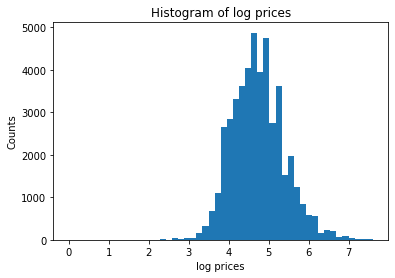

In [7]:
plt.hist(airbnb.log_price, bins=50);
plt.title("Histogram of log prices");
plt.xlabel("log prices");
plt.ylabel("Counts");

We can see why the dataset authors log-transformed `price` then, since we can see `price` is highly skewed.

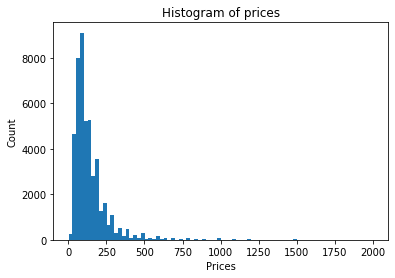

In [8]:
airbnb['price'] = np.exp(airbnb.log_price);
plt.hist(airbnb.price, bins=np.arange(min(airbnb.price), max(airbnb.price) + 25, 25));
plt.title("Histogram of prices");
plt.xlabel("Prices");
plt.ylabel("Count");

Now, we'll quickly run through the rest of our predictor variables. Here, we can see that the vast majority of properties are apartments with houses coming up second, along with condominimums, townhouses, and lofts forming a small minority.

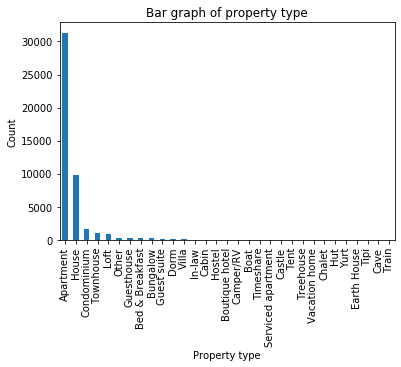

In [9]:
airbnb.property_type.value_counts().plot(kind='bar');
plt.title("Bar graph of property type");
plt.xlabel("Property type");
plt.ylabel("Count");

The vast majority of properties are also "airbnbing" the entire property or private rooms compared to share rooms.

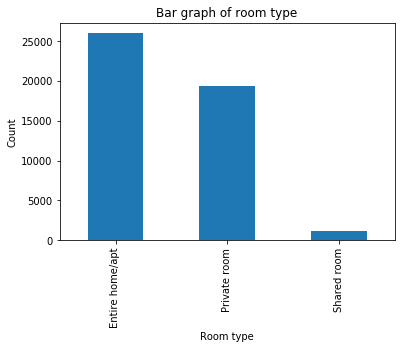

In [10]:
airbnb.room_type.value_counts().plot(kind='bar');
plt.title("Bar graph of room type");
plt.xlabel("Room type");
plt.ylabel("Count");

The number of people accommodated by airbnbs in the dataset are skewed right.

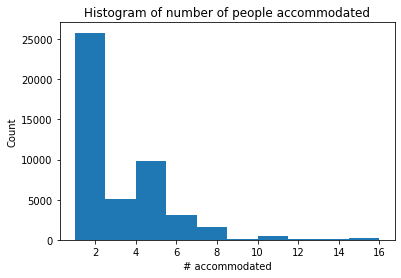

In [11]:
plt.hist(airbnb.accommodates);
plt.title("Histogram of number of people accommodated");
plt.xlabel("# accommodated");
plt.ylabel("Count");

A little less than half of airbnbs have a strict cancellation policy with more than half having moderate or flexible cancellation policies.

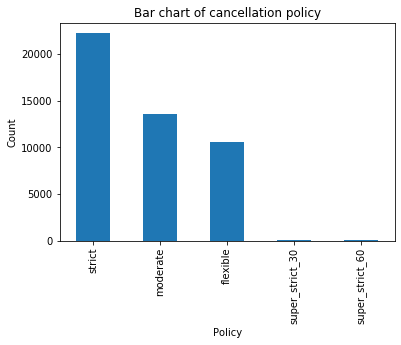

In [12]:
airbnb.cancellation_policy.value_counts().plot(kind='bar');
plt.title("Bar chart of cancellation policy");
plt.xlabel("Policy");
plt.ylabel("Count");

More airbnbs have cleaning fees than don't.

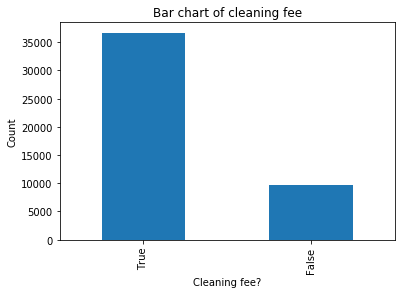

In [13]:
airbnb.cleaning_fee.value_counts().plot(kind='bar');
plt.title("Bar chart of cleaning fee");
plt.xlabel("Cleaning fee?");
plt.ylabel("Count");

We finally get a picture of the geography of the airbnbs in our dataset. As you can see in the graph below, the airbnbs come from the following cities, with most coming from NYC and many coming from LA and SF: 
- NYC
- LA
- SF
- DC
- Boston
- Chicago

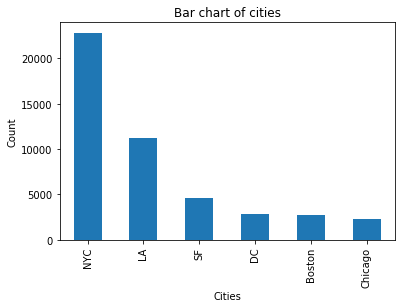

In [14]:
airbnb.city.value_counts().plot(kind='bar');
plt.title("Bar chart of cities");
plt.xlabel("Cities");
plt.ylabel("Count");

Looking at the graph below, we found it strange that all of the airbnb hosts had profile pictures, as we assumed at least some wouldn't to even out the data. After taking another look at the dataset, we found that this column contained strange descriptions in the values too, so we will ultimately not use this variable for our predictions in the future.

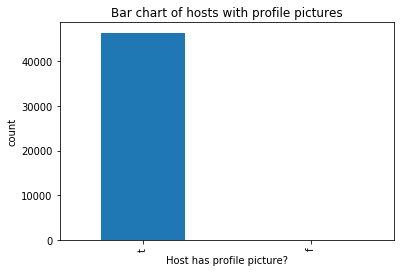

In [15]:
airbnb.host_has_profile_pic.value_counts().plot(kind='bar');
plt.title("Bar chart of hosts with profile pictures");
plt.xlabel("Host has profile picture?");
plt.ylabel("count");

Most airbnb hosts appear to be verified, but a good amount are not.

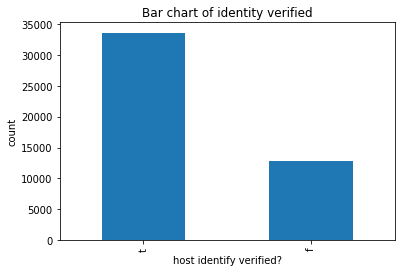

In [16]:
airbnb.host_identity_verified.value_counts().plot(kind='bar');\
plt.title("Bar chart of identity verified");
plt.xlabel("host identify verified?");
plt.ylabel("count");

Most airbnbs are not instant bookable, but a good amount are.

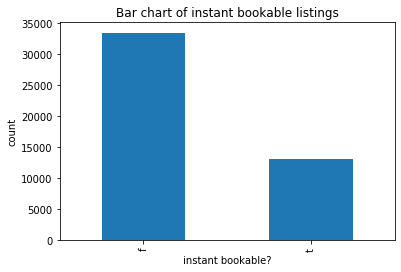

In [17]:
airbnb.instant_bookable.value_counts().plot(kind='bar');
plt.title("Bar chart of instant bookable listings");
plt.xlabel("instant bookable?");
plt.ylabel("count");

The number of reviews is, expectedly, skewed right, as many more airbnbs will have few reviews.

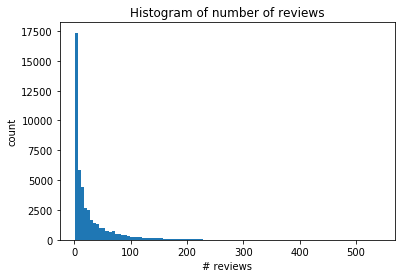

In [18]:
plt.hist(airbnb.number_of_reviews, bins=100);
plt.title("Histogram of number of reviews");
plt.xlabel("# reviews");
plt.ylabel("count");

Similarly, the review scores rating of the airbnbs was skewed left, as we would expect airbnbs to generally have high rating scores (due to the low number of people who review typically)

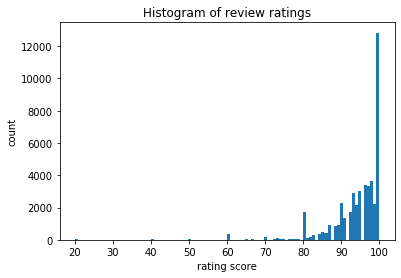

In [19]:
plt.hist(airbnb.review_scores_rating, bins=100);
plt.title("Histogram of review ratings");
plt.xlabel("rating score");
plt.ylabel("count");

This is also expected as most airbnbs will have 1-3 bedrooms.

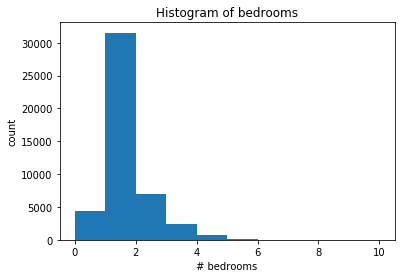

In [20]:
plt.hist(airbnb.bedrooms);
plt.title("Histogram of bedrooms");
plt.xlabel("# bedrooms");
plt.ylabel("count");

Similarly, most airbnbs will have less than 3-4 beds.

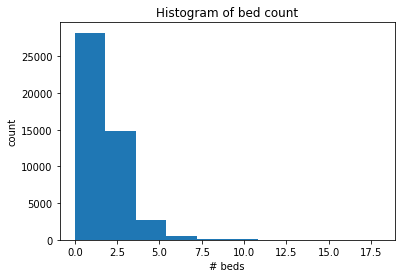

In [21]:
plt.hist(airbnb.beds);
plt.title("Histogram of bed count");
plt.xlabel("# beds");
plt.ylabel("count");

Now, we'll deal with our other variables of interest that we need to transform. Specifically for `host_since`, since it is a date object, we will change that to be the number of days from January 1, 2020 to the host_since date (taking the difference).

In [22]:
# change host_since to number of days of being a host
airbnb['host_since'] = (pd.to_datetime("2020-01-01") - pd.to_datetime(airbnb['host_since'])).dt.days

For `amenities` and `description`, it's hard to take into account those variables. But the simplest thing we can do is measure their lengths, by counting the number of amenities provided and the length of the description in characters.

In [23]:
# count amenities and replace
airbnb['amenities'] = airbnb['amenities'].astype('str').str.count(",") + 1

# count number of characters for description and replace
airbnb['description'] = airbnb['description'].astype('str').str.len()

## Linear Model

Here we'll construct a multiple linear regression model to attempt to predict Airbnb listing prices using the variables we hypothesized earlier. To do this, we'll use Scikit-Learn. We'll firs thave to transform boolean and categorical variables to numerical ones, however, before we can fit our model. 

In [24]:
airbnb["property_type"] = airbnb["property_type"].astype('category').cat.codes;
airbnb["room_type"] = airbnb["room_type"].astype('category').cat.codes;
airbnb["bed_type"] = airbnb["bed_type"].astype('category').cat.codes;
airbnb["cancellation_policy"] = airbnb["cancellation_policy"].astype('category').cat.codes;
airbnb["city"] = airbnb["city"].astype('category').cat.codes;
airbnb["cleaning_fee"] = airbnb["cleaning_fee"].astype('category').cat.codes;
airbnb["host_identity_verified"] = airbnb["host_identity_verified"].astype('category').cat.codes;
airbnb["instant_bookable"] = airbnb["instant_bookable"].astype('category').cat.codes;

Let's create our training and testing datasets

In [25]:
airbnb, test = ms.train_test_split(airbnb, test_size=0.2)

In [26]:
x = airbnb[["property_type", "room_type", "accommodates", "bathrooms", "bed_type", "cancellation_policy", "city", "cleaning_fee", "host_identity_verified", "host_since", "instant_bookable", "number_of_reviews", "review_scores_rating", "bedrooms", "beds", "amenities", "description"]]
y = airbnb["log_price"]

x_test = test[["property_type", "room_type", "accommodates", "bathrooms", "bed_type", "cancellation_policy", "city", "cleaning_fee", "host_identity_verified", "host_since", "instant_bookable", "number_of_reviews", "review_scores_rating", "bedrooms", "beds", "amenities", "description"]]
y_test = test["log_price"]

In [27]:
lin_reg = lm.LinearRegression()
lin_reg.fit(x,y);

# get printed results using statsmodels package
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              log_price   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                          2.177e+05
Date:                Fri, 19 Jun 2020   Prob (F-statistic):                        0.00
Time:                        20:26:22   Log-Likelihood:                         -25225.
No. Observations:               37153   AIC:                                  5.048e+04
Df Residuals:                   37136   BIC:                                  5.063e+04
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
property_type             -0.0034      0.000    -10.208      0.000      -0.004      -0.003
room_type                 -0.4699      0.005    -89.125      0.000      -0.480      -0.460
accommodates               0.0982      0.002     39.556      0.000       0.093       0.103
bathrooms                  0.1636      0.006     28.459      0.000       0.152       0.175
bed_type                   0.2979      0.005     60.750      0.000       0.288       0.308
cancellation_policy        0.0424      0.003     12.766      0.000       0.036       0.049
city                       0.0935      0.002     46.723      0.000       0.090       0.097
cleaning_fee               0.0244      0.007      3.740      0.000       0.012       0.037
host_identity_verified    -0.0217      0.006     -3.665      0.000      -0.033      -0.010
host_since                 0.0001   4.08e-06     28.150      0.000       0.000       0.000
instant_bookable           0.0100      0.006      1.754      0.079      -0.001       0.021
number_of_reviews         -0.0006   6.17e-05     -9.150      0.000      -0.001      -0.000
review_scores_rating       0.0263      0.000    115.714      0.000       0.026       0.027
bedrooms                   0.1298      0.005     27.176      0.000       0.120       0.139
beds                      -0.0464      0.004    -12.557      0.000      -0.054      -0.039
amenities                  0.0072      0.000     18.215      0.000       0.006       0.008
description             1.156e-05   9.64e-06      1.199      0.231   -7.34e-06    3.05e-05
==============================================================================
Omnibus:                     3919.588   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11374.860
Skew:                           0.574   Prob(JB):                         0.00
Kurtosis:                       5.455   Cond. No.                     6.22e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Let's test the accuracy of our model now. With an `r^2` of ~0.60 (rounded up), approximately 60% of the variance in `log_price` is explained by our model. 

In [28]:
y_pred = lin_reg.predict(x_test)
metrics.r2_score(y_test, y_pred)

0.5694067929623499

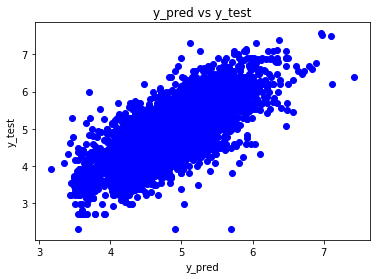

In [29]:
plt.scatter(y_pred, y_test, color='blue');
plt.title("y_pred vs y_test");
plt.xlabel("y_pred");
plt.ylabel("y_test");

Here we'll take a look at the residuals. There does not appear to be any apparent pattern, which provides evidence assumptions for linear regression are met (normality, linearity, constant variance).

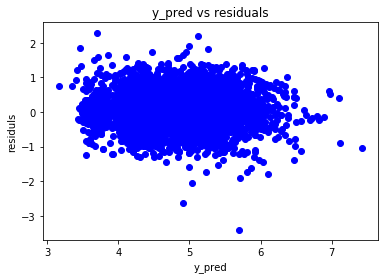

In [30]:
plt.scatter(y_pred, y_test - y_pred, color='blue');
plt.title("y_pred vs residuals");
plt.xlabel("y_pred");
plt.ylabel("residuls");

In [39]:
from sklearn.feature_selection import RFE

model = lm.LinearRegression()
rfe = RFE(model, 10)
fit = rfe.fit(x, y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

cols = list(x.columns)
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Num Features: 10
Selected Features: [False  True  True  True False  True  True  True False False  True False
 False  True  True  True False]
Feature Ranking: [5 1 1 1 2 1 1 1 4 7 1 6 3 1 1 1 8]
Index(['room_type', 'accommodates', 'bathrooms', 'cancellation_policy', 'city',
       'cleaning_fee', 'instant_bookable', 'bedrooms', 'beds', 'amenities'],
      dtype='object')


## Conclusion
Thus, we have developed a model that is able to explain approximately ~60% of the airbnb prices using just the predictor variablers we utilied in our model. And looking at the significance of the predictor variables we chose, it appears that all of them except perhaps `instant_bookable` and `description` were statistically significant in our linear model.

Thus, we believe we can make claim that the prices of Airbnbs, while "arbitrarily" set by the hosts, can still be somewhat explained by some of the variables that were provided to us. Knowing this could be valuable in many situations. This model could be utilized by consumers to determine whether or not they are getting their money's worth for a certain Airbnb compared to others. Or it could be used by hosts to determine if their pricing is overpriced and underpriced for their listing too. Or maybe Airbnb itself could use such a model to moderate listing prices to prevent extremities.

But we think it's important to admit that while ~60% of the prices being explained by our model isn't bad by any means, we think there's definitely room for improvement that we will discuss in Future Directions.

## Future Directions
There is a ton of opportunity to perform further research for this dataset, hopefully with more details on the data in the future too, such as how it was sampeled. Otherwise, some things we could do for improvements in this specific analysis is to figure out different approaches to transforming some of the non-categorical and non-quantitative variables to derive impactful values from them. An example could be using natural language processing to determine numerical values for certain words and descriptions. 

Perhaps we could utilize the other geographic variables too that we have not mentioned. There is data such as zip codes, cities, neighborhoods, longitude, and lattitude that were not utilized, but could be used to construct an interesting geographic analysis, such as creating a Spatial Autoregressive Model.

## Geographic Plot

We thought it might also be fun and interesting to quickly look at the geogrpahical representations fo the data. Looking at all the data on a US map won't be that practical though, given the scale and since all listings belong to just 5 cities (it would just be blobs on each of the 5 cities). So instead, we looked specifically at New York City, where most of the airbnb listings were located.

In [ ]:
# reload dataset
airbnb = pd.read_csv("Airbnb.csv");

In [ ]:
# get bounds for geography
nyc = airbnb.loc[airbnb['city'] == 'NYC']
bounds = (nyc.longitude.min(), nyc.longitude.max(), nyc.latitude.min(), nyc.latitude.max())
bounds

In the graph below, we plotted the longitude and lattitudes of each listing over a map of New York City, and scaled the colors based on the prices of the airbnb listings.

In [ ]:
coord_map = plt.imread('map.png');

fig, ax = plt.subplots(figsize = (8, 7))
ax.scatter(nyc.longitude, nyc.latitude, c=nyc.log_price, cmap='Blues', zorder=1, alpha= 0.1, s=2.5)
ax.set_title('Plotting Airbnb Spatial Data on Map');
ax.set_xlim(bounds[0],bounds[1]);
ax.set_ylim(bounds[2],bounds[3]);
ax.imshow(coord_map, zorder=0, extent = bounds, aspect='auto');
plt.tight_layout();
plt.show()